In [2]:
import sys, platform, os
import numpy as np
from scipy.stats import chisquare

camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower

import matplotlib.pyplot as plt
import pandas as pd

# Obteniendo los valores de los parámetros

In [12]:
#importando el espectro original para compararlo
df_exp = pd.read_csv('D_ell2.csv')
col_2 = df_exp.D_ell2
rows_exp = df_exp.tail(5049)
row2_exp = rows_exp.D_ell2

ombh2s = np.linspace(0.005, 0.150, 10)
omch2s = np.linspace(0.005, 0.150, 10)
for ombh2 in ombh2s:
    ombh2 = ombh2
    #print(ombh2)    
    for omch2 in omch2s:
        omch2 = omch2
        pars = camb.CAMBparams()
        pars.set_cosmology(H0=67.5, ombh2=ombh2, omch2=omch2, mnu=0.06, omk=0, tau=0.06)
        pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
        pars.set_for_lmax(5050, lens_potential_accuracy=0);
        #calculate results for these parameters
        results = camb.get_results(pars)
        #print(omch2)
        powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
        totCL=powers['total']
        unlensedCL=powers['unlensed_scalar']
        ls = np.arange(totCL.shape[0])
        ell  = np.array(ls)
        D_ell = np.array(unlensedCL[:,0])
        #print(row2_obs)
        np.savetxt("test" + str(ombh2) + "," + str(omch2) + ".csv",  list(zip(ls,D_ell)), fmt='%.7g', delimiter=',', header='ell,D_ell')
        df_obs = pd.read_csv("test" + str(ombh2) + "," + str(omch2) + ".csv")
        col2 = df_obs.D_ell
        rows_obs = df_obs.head(5049)
        row2_obs = rows_obs.D_ell
        #comparando los dos espectros
        chi2 = chisquare(row2_obs, f_exp=row2_exp, ddof=5046)
        #chi_2 = chi2 / 5046
        #np.savetxt("chi2.csv",  list(zip(ombh2,chi2)), fmt='%.7g', delimiter=',', header='ombh2,chi2')
        print(ombh2, omch2, chi2)
    #for ax in ax.reshape(-1): ax.set_xlim([2,5050]);
    #plt.show()
    #plt.savefig("Graph" + str(ombh2) + "," + str(omch2) +".png", format="PNG")


0.005 0.005 Power_divergenceResult(statistic=9827422.84895479, pvalue=0.0)
0.005 0.021111111111111112 Power_divergenceResult(statistic=2090957.4853165606, pvalue=0.0)
0.005 0.03722222222222222 Power_divergenceResult(statistic=997312.5421701157, pvalue=0.0)
0.005 0.05333333333333333 Power_divergenceResult(statistic=856376.4518395732, pvalue=0.0)
0.005 0.06944444444444445 Power_divergenceResult(statistic=944327.735014724, pvalue=0.0)
0.005 0.08555555555555555 Power_divergenceResult(statistic=1067082.695135667, pvalue=0.0)
0.005 0.10166666666666667 Power_divergenceResult(statistic=1182128.6754842056, pvalue=0.0)
0.005 0.11777777777777779 Power_divergenceResult(statistic=1284217.6251510738, pvalue=0.0)
0.005 0.1338888888888889 Power_divergenceResult(statistic=1374754.1632178004, pvalue=0.0)
0.005 0.15 Power_divergenceResult(statistic=1456122.8532147636, pvalue=0.0)
0.021111111111111112 0.005 Power_divergenceResult(statistic=6219265.373775274, pvalue=0.0)
0.021111111111111112 0.021111111111

In [23]:
df_exp = pd.read_csv('D_ell2.csv')
#col_1 = df_exp.ell2
col_2 = df_exp.D_ell2
rows_exp = df_exp.tail(5049)
row2_exp = rows_exp.D_ell2



ombh2s = np.linspace(0.05, 0.075, 10)
omch2s = np.linspace(0.05, 0.150, 10)
outF = open("myOutFile.txt", "wb")
#fig = plt.figure()
for ombh2 in ombh2s:
    ombh2 = ombh2
    #print(ombh2)
    #fig, ax = plt.subplots(1,1, figsize=(8,6), squeeze=False)
    
    for omch2 in omch2s:
        omch2 = omch2
        pars = camb.CAMBparams()
        pars.set_cosmology(H0=67.5, ombh2=ombh2, omch2=omch2, mnu=0.06, omk=0, tau=0.06)
        pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
        pars.set_for_lmax(5050, lens_potential_accuracy=0);
        #calculate results for these parameters
        results = camb.get_results(pars)
        #print(omch2)
        powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
        totCL=powers['total']
        unlensedCL=powers['unlensed_scalar']
        ls = np.arange(totCL.shape[0])
        #print(ls)
        #ax[0,0].plot(ls, unlensedCL[:,0], label='$\\Omega_b h^2$ = {ombh2}, $\\Omega_c h^2 $ = {omch2}'.format(ombh2=ombh2,omch2=omch2))
        #plt.legend(loc='best')
        #plt.xscale('log')
        #plt.xlabel('$\ell$')
        #plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
        ell  = np.array(ls)
        D_ell = np.array(unlensedCL[:,0])
        #print(row2_obs)
        np.savetxt("test" + str(ombh2) + "," + str(omch2) + ".csv",  list(zip(ls,D_ell)), fmt='%.7g', delimiter=',', header='ell,D_ell')
        df_obs = pd.read_csv("test" + str(ombh2) + "," + str(omch2) + ".csv")
        #col1 = df_obs.'#'ell
        col2 = df_obs.D_ell
        rows_obs = df_obs.head(5049)
        row2_obs = rows_obs.D_ell
        #print(row2_obs)
        chi2 = chisquare(row2_obs, f_exp=row2_exp, ddof=5046)
        #chi_2 = chi2 / 5046
        #np.savetxt("chi2.csv",  list(zip(ombh2,chi2)), fmt='%.7g', delimiter=',', header='ombh2,chi2')
        print(ombh2, omch2, chi2)
    #for ax in ax.reshape(-1): ax.set_xlim([2,5050]);
    #plt.show()
    #plt.savefig("Graph" + str(ombh2) + "," + str(omch2) +".png", format="PNG")


0.05 0.05 Power_divergenceResult(statistic=355322.74279629026, pvalue=0.0)
0.05 0.061111111111111116 Power_divergenceResult(statistic=164988.91833173, pvalue=0.0)
0.05 0.07222222222222222 Power_divergenceResult(statistic=68768.25031937883, pvalue=0.0)
0.05 0.08333333333333333 Power_divergenceResult(statistic=35443.19421224976, pvalue=0.0)
0.05 0.09444444444444444 Power_divergenceResult(statistic=41854.99425758108, pvalue=0.0)
0.05 0.10555555555555556 Power_divergenceResult(statistic=71750.1774557954, pvalue=0.0)
0.05 0.11666666666666665 Power_divergenceResult(statistic=114442.67368991078, pvalue=0.0)
0.05 0.12777777777777777 Power_divergenceResult(statistic=163153.55493569534, pvalue=0.0)
0.05 0.1388888888888889 Power_divergenceResult(statistic=213891.02686809166, pvalue=0.0)
0.05 0.15 Power_divergenceResult(statistic=264286.8610028919, pvalue=0.0)
0.05277777777777778 0.05 Power_divergenceResult(statistic=373554.71335670166, pvalue=0.0)
0.05277777777777778 0.061111111111111116 Power_di

In [26]:
import requests
import json
df_exp = pd.read_csv('D_ell2.csv')
#col_1 = df_exp.ell2
col_2 = df_exp.D_ell2
rows_exp = df_exp.tail(5049)
row2_exp = rows_exp.D_ell2



ombh2s = np.linspace(0.058, 0.064, 10)
omch2s = np.linspace(0.090, 0.107, 10)
outF = open("myOutFile.txt", "wb")
#fig = plt.figure()
for ombh2 in ombh2s:
    ombh2 = ombh2
    #print(ombh2)
    #fig, ax = plt.subplots(1,1, figsize=(8,6), squeeze=False)
    
    for omch2 in omch2s:
        omch2 = omch2
        pars = camb.CAMBparams()
        pars.set_cosmology(H0=67.5, ombh2=ombh2, omch2=omch2, mnu=0.06, omk=0, tau=0.06)
        pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
        pars.set_for_lmax(5050, lens_potential_accuracy=0);
        #calculate results for these parameters
        results = camb.get_results(pars)
        #print(omch2)
        powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
        totCL=powers['total']
        unlensedCL=powers['unlensed_scalar']
        ls = np.arange(totCL.shape[0])
        #print(ls)
        #ax[0,0].plot(ls, unlensedCL[:,0], label='$\\Omega_b h^2$ = {ombh2}, $\\Omega_c h^2 $ = {omch2}'.format(ombh2=ombh2,omch2=omch2))
        #plt.legend(loc='best')
        #plt.xscale('log')
        #plt.xlabel('$\ell$')
        #plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
        ell  = np.array(ls)
        D_ell = np.array(unlensedCL[:,0])
        #print(row2_obs)
        np.savetxt("test" + str(ombh2) + "," + str(omch2) + ".csv",  list(zip(ls,D_ell)), fmt='%.7g', delimiter=',', header='ell,D_ell')
        df_obs = pd.read_csv("test" + str(ombh2) + "," + str(omch2) + ".csv")
        #col1 = df_obs.'#'ell
        col2 = df_obs.D_ell
        rows_obs = df_obs.head(5049)
        row2_obs = rows_obs.D_ell
        #print(row2_obs)
        chi2 = chisquare(row2_obs, f_exp=row2_exp, ddof=5046)
        #chi_2 = chi2 / 5046
        #np.savetxt("chi2.csv",  list(zip(ombh2,chi2)), fmt='%.7g', delimiter=',', header='ombh2,chi2')
        print(ombh2, omch2, chi2)
    #for ax in ax.reshape(-1): ax.set_xlim([2,5050]);
    #plt.show()
    #plt.savefig("Graph" + str(ombh2) + "," + str(omch2) +".png", format="PNG")

0.058 0.09 Power_divergenceResult(statistic=9963.315070333849, pvalue=0.0)
0.058 0.09188888888888888 Power_divergenceResult(statistic=7047.268645460837, pvalue=0.0)
0.058 0.09377777777777778 Power_divergenceResult(statistic=5006.22094175291, pvalue=0.0)
0.058 0.09566666666666666 Power_divergenceResult(statistic=3778.1901156668446, pvalue=0.0)
0.058 0.09755555555555555 Power_divergenceResult(statistic=3306.328923038178, pvalue=0.0)
0.058 0.09944444444444445 Power_divergenceResult(statistic=3535.7101391223287, pvalue=0.0)
0.058 0.10133333333333333 Power_divergenceResult(statistic=4414.9092589363645, pvalue=0.0)
0.058 0.10322222222222222 Power_divergenceResult(statistic=5902.34387079733, pvalue=0.0)
0.058 0.10511111111111111 Power_divergenceResult(statistic=7938.702240205235, pvalue=0.0)
0.058 0.107 Power_divergenceResult(statistic=10487.168079934567, pvalue=0.0)
0.05866666666666667 0.09 Power_divergenceResult(statistic=11262.964794402615, pvalue=0.0)
0.05866666666666667 0.091888888888888

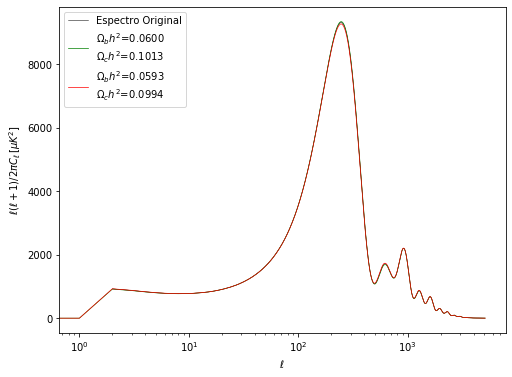

In [52]:
data = np.genfromtxt("D_ell.csv", delimiter=",", names=["x", "y"])
data1 = np.genfromtxt("test0.059333333333333335,0.09944444444444445.csv", delimiter=",", names=["x", "y"])
data2 = np.genfromtxt("test0.06066666666666667,0.10133333333333333.csv", delimiter=",", names=["x", "y"])


plt.figure(figsize=(8,6))
plt.xscale('log')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')

plt.semilogx(data['x'], data['y'],color="black", label="Espectro Original", linewidth=0.5)
plt.semilogx(data2['x'], data2['y'],color="green", label="$\\Omega_b h^2$=0.0600\n$\\Omega_c h^2$=0.1013", linewidth=0.7)
plt.semilogx(data1['x'], data1['y'],color="red", label="$\\Omega_b h^2$=0.0593\n$\\Omega_c h^2$=0.0994", linewidth=0.7)

plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
plt.legend(loc="upper left")
plt.savefig('comparacion.png', dpi=150)
plt.show()

